In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import json
import requests

## Get Current Data from Lending Club

In [3]:

headers = {'Authorization':'VEzi+drgj+ybnUSkbtrCTsngN/g='}
parameters = {'showAll': True} 
url='https://api.lendingclub.com/api/investor/v1/loans/listing'
r=requests.get(url, headers=headers, params = parameters)

In [19]:
data = r.json()
myData =data['loans']

In [20]:
with open('current_list.txt', 'w') as outfile:
    json.dump(myData, outfile)

In [21]:
df_current=pd.read_json('current_list.txt')

In [23]:
df_current.describe()

,accNowDelinq,accOpenPast24Mths,allUtil,annualInc,annualIncJoint,avgCurBal,bcOpenToBuy,bcUtil,chargeoffWithin12Mths,collections12MthsExMed,...,totCollAmt,totCurBal,totHiCredLim,totalAcc,totalBalExMort,totalBalIl,totalBcLimit,totalCuTl,totalIlHighCreditLimit,totalRevHiLim
count,101.0,101.000000,101.000000,101.000000,14.000000,101.000000,101.000000,101.000000,101.0,101.0,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.0,4.940594,54.729703,100602.799208,128860.071429,11442.217822,20554.326733,51.398020,0.0,0.0,...,586.811881,151854.623762,198113.544554,25.732673,69164.613861,44062.356436,37810.396040,1.524752,55091.881188,52829.702970
std,0.0,2.848936,19.249678,82763.440060,54008.380547,11063.858383,26733.885269,27.029554,0.0,0.0,...,3128.445166,160883.567131,184578.127496,13.099535,64830.667915,57389.278411,35805.290333,3.084134,58970.344079,55341.860819
min,0.0,0.000000,10.600000,15000.000000,71880.000000,190.000000,0.000000,2.000000,0.0,0.0,...,0.000000,1896.000000,17600.000000,7.000000,1896.000000,0.000000,1700.000000,0.000000,0.000000,3300.000000
25%,0.0,3.000000,41.100000,55000.000000,92000.000000,3007.000000,5350.000000,31.400000,0.0,0.0,...,0.000000,31183.000000,58877.000000,16.000000,27943.000000,9484.000000,15200.000000,0.000000,19231.000000,23600.000000
50%,0.0,5.000000,53.600000,82500.000000,110500.000000,7209.000000,11930.000000,50.100000,0.0,0.0,...,0.000000,87904.000000,125595.000000,23.000000,44224.000000,22808.000000,26500.000000,0.000000,36719.000000,36900.000000
75%,0.0,7.000000,66.800000,120000.000000,156500.000000,17598.000000,27026.000000,73.300000,0.0,0.0,...,0.000000,241927.000000,276442.000000,35.000000,91781.000000,50729.000000,48600.000000,2.000000,70640.000000,68600.000000
max,0.0,13.000000,108.600000,700000.000000,267000.000000,60874.000000,165485.000000,100.200000,0.0,0.0,...,30073.000000,913109.000000,974963.000000,62.000000,331531.000000,307495.000000,222700.000000,23.000000,298336.000000,417000.000000


In [29]:
df_current = pd.io.json.json_normalize(myData)

In [30]:
df_current.tail()

,accNowDelinq,accOpenPast24Mths,acceptD,addrState,addrZip,allUtil,annualInc,annualIncJoint,applicationType,avgCurBal,...,totCollAmt,totCurBal,totHiCredLim,totalAcc,totalBalExMort,totalBalIl,totalBcLimit,totalCuTl,totalIlHighCreditLimit,totalRevHiLim
96,0,3,2019-02-01T20:18:41.000-08:00,CA,914xx,27.5,100000.0,NaN,INDIVIDUAL,18585,...,0,278781,453698,38,278781,16067.0,167000,0,36698,417000
97,0,3,2019-01-31T17:36:31.000-08:00,CO,810xx,52.4,85000.0,NaN,INDIVIDUAL,26452,...,0,396786,501272,19,68000,22047.0,104400,1,25000,108900
98,0,9,2019-01-22T14:13:06.000-08:00,TN,378xx,76.1,15000.0,105000.0,JOINT,22987,...,0,367796,414238,62,132777,89651.0,26400,23,119938,54900
99,0,2,2019-02-03T04:53:36.000-08:00,NY,102xx,10.6,75000.0,NaN,INDIVIDUAL,512,...,194,3072,28900,16,3072,0.0,21000,0,0,28900
100,0,6,2019-01-31T16:38:56.000-08:00,IN,465xx,81.6,62400.0,159661.0,JOINT,10188,...,308,183384,240186,31,168369,150195.0,22700,0,171150,35200


## Historical Data

In [4]:
df_2017_Q1 = pd.read_csv('LoanStats_securev1_2017Q1.csv', skiprows = 1)
df_2017_Q2 = pd.read_csv('LoanStats_securev1_2017Q2.csv', skiprows = 1)
df_2017_Q3 = pd.read_csv('LoanStats_securev1_2017Q3.csv', skiprows = 1)
df_2017_Q4 = pd.read_csv('LoanStats_securev1_2017Q4.csv', skiprows = 1)
df_2017_Q1.head()

C:\Users\Melody Zhang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Melody Zhang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,103771912,NaN,16000.0,16000.0,16000.0,60 months,12.74%,361.93,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,104090257,NaN,11875.0,11875.0,11875.0,36 months,11.44%,391.26,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,104045864,NaN,12000.0,12000.0,12000.0,36 months,7.99%,375.99,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,104240334,NaN,25000.0,25000.0,25000.0,36 months,15.99%,878.81,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,104170234,NaN,1500.0,1500.0,1500.0,36 months,5.32%,45.18,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
frames = [df_2017_Q1, df_2017_Q2, df_2017_Q3, df_2017_Q4]
df_2017 = pd.concat(frames)
df_2017.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,desc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,443579.000000,443579.000000,443579.000000,443579.000000,4.435790e+05,0.0,443065.000000,443579.000000,443579.000000,...,2604.0,2604.000000,2604.0,2604.000000,2104.000000,2604.000000,2604.000000,3423.000000,3423.000000,3423.000000
mean,NaN,14845.060463,14845.060463,14840.839712,442.495150,8.010556e+04,NaN,19.223338,0.325861,700.296633,...,3.0,196.015081,3.0,12.895929,575.957624,14488.423660,217.715653,6224.761916,50.764318,17.756938
std,NaN,9632.634949,9632.634949,9630.180034,283.153059,2.041056e+05,NaN,17.582542,0.914124,34.183518,...,0.0,151.927992,0.0,9.781100,439.379901,8603.473428,223.773462,4386.016823,7.762857,7.286806
min,NaN,1000.000000,1000.000000,975.000000,7.610000,0.000000e+00,NaN,-1.000000,0.000000,660.000000,...,3.0,3.580000,3.0,0.000000,10.740000,437.280000,0.010000,310.000000,30.000000,1.000000
25%,NaN,7200.000000,7200.000000,7200.000000,237.060000,4.700000e+04,NaN,11.950000,0.000000,675.000000,...,3.0,80.190000,3.0,1.000000,240.915000,7506.092500,47.312500,2924.500000,45.000000,14.000000
50%,NaN,12000.000000,12000.000000,12000.000000,364.940000,6.600000e+04,NaN,17.980000,0.000000,695.000000,...,3.0,157.035000,3.0,13.000000,466.080000,12934.740000,150.675000,5093.000000,50.000000,18.000000
75%,NaN,20000.000000,20000.000000,20000.000000,593.960000,9.500000e+04,NaN,24.740000,0.000000,720.000000,...,3.0,271.345000,3.0,21.000000,787.860000,20498.080000,324.885000,8316.000000,55.010000,24.000000
max,NaN,40000.000000,40000.000000,40000.000000,1719.830000,1.100000e+08,NaN,999.000000,42.000000,845.000000,...,3.0,943.940000,3.0,30.000000,2680.890000,40306.410000,1291.210000,25790.000000,100.000000,181.000000


In [5]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443587 entries, 0 to 118649
Columns: 151 entries, id to settlement_term
dtypes: float64(112), object(39)
memory usage: 514.4+ MB


In [40]:
print('len of num_feature is:', len(num_feature), 'ob_feature:', len(ob_feature))

len of num_feature is: 110 ob_feature: 39


In [6]:
df_2017 = df_2017.dropna(axis = 0, thresh=10, how="any")
df_2017 = df_2017.dropna(axis = 1, thresh=400000, how="any")
df_2017 = df_2017.dropna(axis = 1, how = 'all')
df_2017

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,103771912,16000.0,16000.0,16000.0,60 months,12.74%,361.93,C,C1,claims analyst,...,50.0,1.0,0.0,79751.0,44263.0,8000.0,46451.0,N,Cash,N
1,104090257,11875.0,11875.0,11875.0,36 months,11.44%,391.26,B,B4,Shop foreman,...,25.0,0.0,0.0,319205.0,61637.0,24300.0,56205.0,N,Cash,N
2,104045864,12000.0,12000.0,12000.0,36 months,7.99%,375.99,A,A5,registerd nurse,...,33.3,0.0,0.0,601250.0,154720.0,48000.0,148041.0,N,Cash,N
3,104240334,25000.0,25000.0,25000.0,36 months,15.99%,878.81,C,C5,Ckerk,...,37.5,0.0,0.0,67853.0,38809.0,19700.0,38153.0,N,Cash,N
4,104170234,1500.0,1500.0,1500.0,36 months,5.32%,45.18,A,A1,Auto Technician,...,0.0,0.0,0.0,163700.0,10658.0,14000.0,5200.0,N,Cash,N
5,104190252,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,Maintenance Assistant,...,0.0,0.0,0.0,33985.0,10041.0,15800.0,18185.0,N,Cash,N
6,103951365,20000.0,20000.0,20000.0,36 months,8.24%,628.95,B,B1,IT Lead Business Analyst,...,75.0,1.0,0.0,301225.0,32374.0,16700.0,38772.0,N,Cash,N
7,104190255,35000.0,35000.0,35000.0,60 months,25.49%,1037.38,E,E4,Human Resource Specialist LER,...,100.0,0.0,0.0,424707.0,81780.0,32700.0,52309.0,N,Cash,N
8,103912095,5000.0,5000.0,5000.0,36 months,7.99%,156.66,A,A5,registered nurse,...,50.0,0.0,0.0,116993.0,24731.0,6500.0,32197.0,N,Cash,N
9,103618433,17000.0,17000.0,17000.0,60 months,13.99%,395.48,C,C3,Accounting Assistant,...,50.0,0.0,0.0,300065.0,37100.0,22300.0,38430.0,N,Cash,N


In [7]:
cols=df_2017.columns.values
cols

array(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
 

In [8]:
num_feature=[]
ob_feature=[]
for col in cols:
    if df_2017[col].dtype == 'object':
        ob_feature.append(col)
    else:
        num_feature.append(col)

In [9]:
num_feature

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mor

In [10]:
ob_feature

['id',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [10]:
print('len of num_feature is:', len(num_feature), 'ob_feature:', len(ob_feature))

len of num_feature is: 79 ob_feature: 26


In [12]:
df_2017['grade'].value_counts()

C    145144
B    133127
A     78796
D     56646
E     20167
F      6242
G      3457
Name: grade, dtype: int64

In [18]:
df_2017['term'].values

array([' 60 months', ' 36 months', ' 36 months', ..., ' 36 months',
       ' 60 months', ' 60 months'], dtype=object)

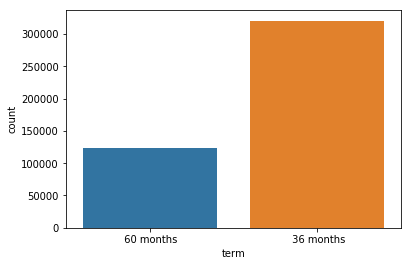

In [23]:
sns.countplot(x='term',data=df_2017)
plt.show()

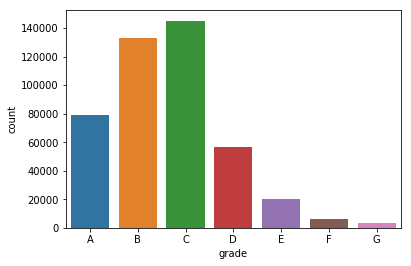

In [30]:
sns.countplot(x='grade',data=df_2017, order = ['A','B','C','D','E','F','G'])
plt.show()

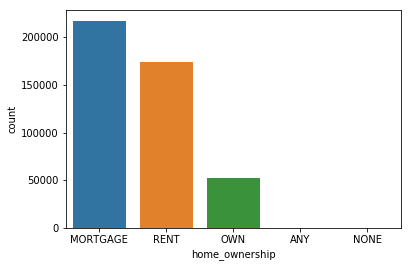

In [20]:
sns.countplot(x='home_ownership',data=df_2017, order = df_2017['home_ownership'].value_counts().index)
plt.show()

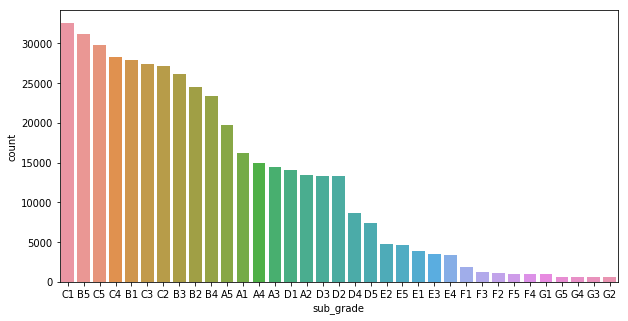

In [21]:
plt.figure(figsize=[10,5])
sns.countplot(x='sub_grade',data=df_2017, order = df_2017['sub_grade'].value_counts().index)
plt.show()

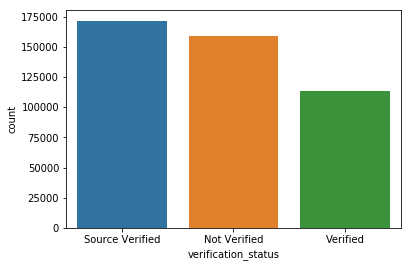

In [24]:

sns.countplot(x='verification_status',data=df_2017, order = df_2017['verification_status'].value_counts().index)
plt.show()

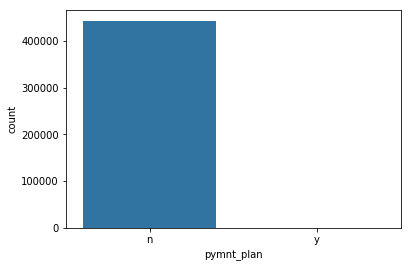

In [25]:
sns.countplot(x='pymnt_plan',data=df_2017, order = df_2017['pymnt_plan'].value_counts().index)
plt.show()


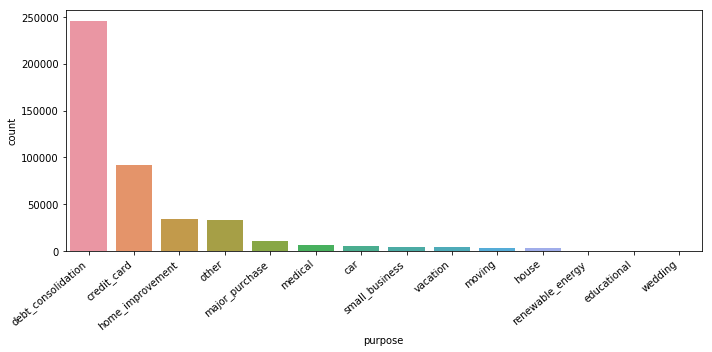

In [29]:

plt.figure(figsize=[10,5])
ax = sns.countplot(x='purpose',data=df_2017, order = df_2017['purpose'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

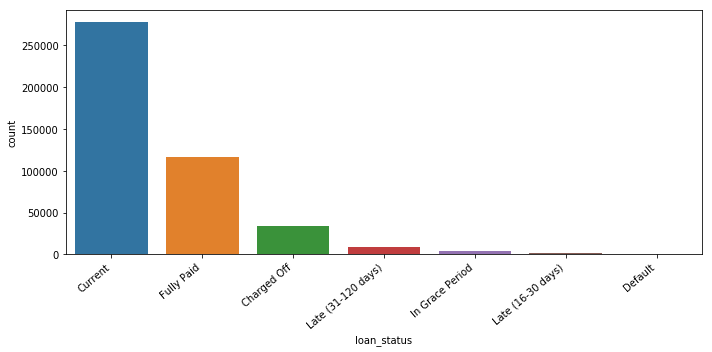

In [32]:
plt.figure(figsize=[10,5])
ax = sns.countplot(x='loan_status',data=df_2017, order = df_2017['loan_status'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [33]:
df_2017['loan_status'].value_counts()

Current               278150
Fully Paid            116178
Charged Off            33595
Late (31-120 days)      9153
In Grace Period         4433
Late (16-30 days)       2058
Default                   12
Name: loan_status, dtype: int64

In [34]:
df_2017['late'] = df_2017['loan_status'].map({'Current': 0, 'Fully Paid': 0, 'Charged off': 0, 'Late (31-120 days)': 1, 'In Grace Period': 0, 'Late (16-30 days)': 1, 'Default': 0})

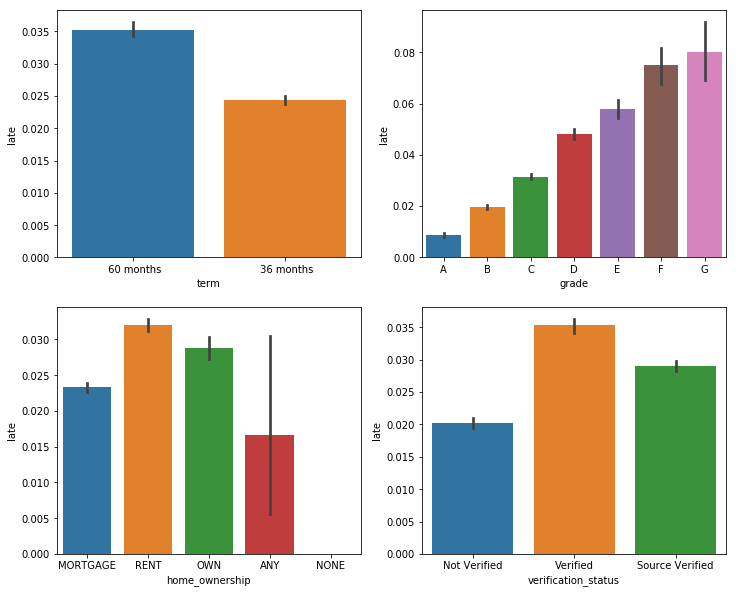

In [36]:
plt.figure(figsize=[12,10])

plt.subplot(221)
sns.barplot(x = 'term', y = 'late', data = df_2017)
#People with higher socieconomic class had a higher rate of survival

plt.subplot(222)
sns.barplot(x = 'grade', y = 'late', data = df_2017, order = ['A','B','C','D','E','F','G'])
#People embarked at C are more likely to survive

plt.subplot(223)
sns.barplot(x='home_ownership',y='late',data = df_2017)
#People with a recorded Cabin number are more likely to survive

plt.subplot(224)
sns.barplot(x='verification_status',y='late',data = df_2017)

In [43]:
# df_2017['int_rate'].value_counts()
df_2017['int_rate_float'] = df_2017['int_rate'].astype('str').map(lambda x: x[:-1]).astype(float)

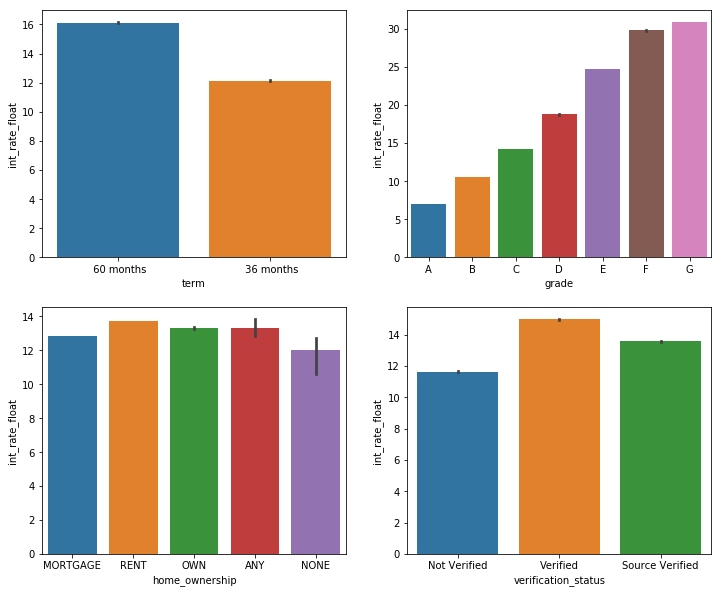

In [42]:
plt.figure(figsize=[12,10])

plt.subplot(221)
sns.barplot(x = 'term', y = 'int_rate_float', data = df_2017)

plt.subplot(222)
sns.barplot(x = 'grade', y = 'int_rate_float', data = df_2017, order = ['A','B','C','D','E','F','G'])

plt.subplot(223)
sns.barplot(x='home_ownership',y='int_rate_float',data = df_2017)

plt.subplot(224)
sns.barplot(x='verification_status',y='int_rate_float',data = df_2017)